# Data Downloading 

Expression in the wild ExpW dataset is downloaded and extracted by using Archive Manager.


# Preprocessing

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from PIL import Image

In [3]:
data_path = 'image/origin'
output_folder = "cropped"
labels_file = 'label/label.lst'

In [4]:
import pandas as pd
dataframe = pd.read_csv(labels_file, sep=" ", header=None)
col_names = "image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_cofidence expression_label".split()
dataframe.columns = col_names
dataframe

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [5]:
dataframe.describe()

,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
count,91793.000000,91793.000000,91793.000000,91793.000000,91793.000000,91793.000000,91793.000000
mean,0.966751,149.780365,321.105128,458.110194,286.785430,50.177224,4.190036
std,1.654993,194.647812,314.567562,345.457619,232.724853,25.171536,1.724111
min,0.000000,0.000000,0.000000,46.000000,46.000000,0.010154,0.000000
25%,0.000000,39.000000,115.000000,234.000000,141.000000,30.545100,3.000000
50%,0.000000,82.000000,230.000000,363.000000,215.000000,49.789400,4.000000
75%,1.000000,180.000000,412.000000,558.000000,345.000000,68.912000,6.000000
max,9.000000,2518.000000,2917.000000,2999.000000,2636.000000,142.413000,6.000000


# Resizing and Cropping Images

In [6]:
from tqdm import tqdm_gui

all_images = []
all_labels = []
all_confidences = []

for i, row in dataframe.iterrows():
    image_name = row["image_name"]
    x1 = row["face_box_left"]
    x2 = row["face_box_right"]
    y1 = row["face_box_top"]
    y2 = row["face_box_bottom"]
    label = row["expression_label"]
    confidence = row["face_box_cofidence"]

    if confidence < 60:
        continue  # Skip images with confidence less than 60

    combined_filename = os.path.join(data_path, image_name)
    img = cv2.imread(combined_filename)

    if img is not None:
        cropped_img = img[y1:y2, x1:x2]
        print(f"Face shape: {cropped_img.shape}, x1={x1}, x2={x2}, y1={y1}, y2={y2}")
    else:
        continue

    if cropped_img is not None:
        face_resized = cv2.resize(cropped_img, (64, 64))
        #output_filename = os.path.join(output_folder, f"{os.path.splitext(image_name)[0]}_cropped.jpg")
        #cv2.imwrite(output_filename, face_resized)
    else:
        continue

    all_images.append(face_resized)
    all_labels.append(label)
    all_confidences.append(confidence)

Face shape: (311, 311, 3), x1=51, x2=362, y1=77, y2=388
Face shape: (381, 381, 3), x1=31, x2=412, y1=95, y2=476
Face shape: (374, 374, 3), x1=468, x2=842, y1=93, y2=467
Face shape: (113, 113, 3), x1=263, x2=376, y1=56, y2=169
Face shape: (272, 272, 3), x1=249, x2=521, y1=158, y2=430
Face shape: (383, 383, 3), x1=127, x2=510, y1=95, y2=478
Face shape: (135, 135, 3), x1=326, x2=461, y1=67, y2=202
Face shape: (317, 317, 3), x1=185, x2=502, y1=52, y2=369
Face shape: (191, 191, 3), x1=286, x2=477, y1=47, y2=238
Face shape: (228, 228, 3), x1=228, x2=456, y1=19, y2=247
Face shape: (160, 160, 3), x1=40, x2=200, y1=26, y2=186
Face shape: (163, 163, 3), x1=217, x2=380, y1=27, y2=190
Face shape: (67, 67, 3), x1=89, x2=156, y1=89, y2=156
Face shape: (386, 386, 3), x1=64, x2=450, y1=96, y2=482
Face shape: (133, 133, 3), x1=166, x2=299, y1=33, y2=166
Face shape: (111, 111, 3), x1=167, x2=278, y1=27, y2=138
Face shape: (186, 186, 3), x1=171, x2=357, y1=31, y2=217
Face shape: (196, 196, 3), x1=130, x2

In [7]:
print(len(all_images))
print(len(all_labels))

33375
33375


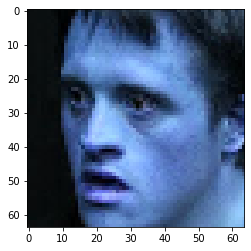

In [8]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.imshow(all_images[i])

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Converting List to Numpy Arrays

In [11]:
# Convert lists to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Normalize pixel values to the range [0, 1]
all_faces = all_images.astype('float32') / 255.0

# One-hot encode the expression labels
all_labels = to_categorical(all_labels, num_classes=7)

# Split the dataset into training, validation, and test sets (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(all_faces, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Print the shapes of the data splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (23362, 64, 64, 3)
y_train shape: (23362, 7)
X_val shape: (5006, 64, 64, 3)
y_val shape: (5006, 7)
X_test shape: (5007, 64, 64, 3)
y_test shape: (5007, 7)


# Building the CNN model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2


# Set the input shape based on the cropped face dimensions
img_height, img_width, img_channels = all_faces.shape[1:]

# Build the CNN model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Learning Rate Schedule and Early Stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Set batch size and number of epochs
batch_size = 32
epochs = 10

# Training the model

In [1]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[reduce_lr, early_stop])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Analyze the results
# Plot accuracy and loss curves during training
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'model' is not defined

# Confusion Matrix

42/42 [==============================] - 0s 3ms/step


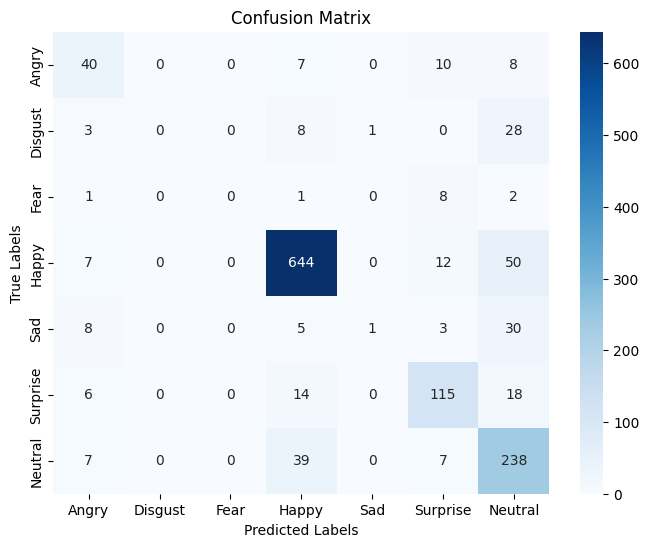

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Get the model predictions on the test set
y_pred = model.predict(X_test)

# Convert the one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()